# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [52]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [55]:
# Set the API base URL

url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url.format(lat=lats[i], lon=lngs[i], api_key=weather_api_key) # YOUR CODE HERE
    city_url = url+city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        response_json = response.json()
        #city_weather = response_json['weather'] # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]# YOUR CODE HERE
        city_lng = response_json["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = response_json["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = response_json["main"]["humidity"]# YOUR CODE HERE
        city_clouds = response_json["clouds"]["all"]# YOUR CODE HERE
        city_wind = response_json["wind"]["speed"]# YOUR CODE HERE
        city_country = response_json["sys"]["country"]# YOUR CODE HERE
        city_date = response_json["dt"]# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # pause to avoid rate limiting
    #time.sleep(1)

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kingston
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | mitsamiouli
Processing Record 4 of Set 1 | richards bay
Processing Record 5 of Set 1 | severinia
Processing Record 6 of Set 1 | antofagasta
Processing Record 7 of Set 1 | durban
Processing Record 8 of Set 1 | nsanje
Processing Record 9 of Set 1 | dunay
Processing Record 10 of Set 1 | kiboga
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | trevelin
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | tolanaro
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | la passe
Processing Record 22 of Set 1 | sur
Proces

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kingston,17.9970,-76.7936,31.53,70,75,2.57,JM,1722542332
1,port alfred,-33.5906,26.8910,11.77,89,17,0.77,ZA,1722542332
2,mitsamiouli,-11.3847,43.2844,25.43,67,2,2.81,KM,1722542332
3,richards bay,-28.7830,32.0377,19.01,80,6,5.47,ZA,1722542333
4,severinia,-20.8094,-48.8028,29.46,20,0,3.98,BR,1722542333


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,31.53,70,75,2.57,JM,1722542332
1,port alfred,-33.5906,26.8910,11.77,89,17,0.77,ZA,1722542332
2,mitsamiouli,-11.3847,43.2844,25.43,67,2,2.81,KM,1722542332
3,richards bay,-28.7830,32.0377,19.01,80,6,5.47,ZA,1722542333
4,severinia,-20.8094,-48.8028,29.46,20,0,3.98,BR,1722542333


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

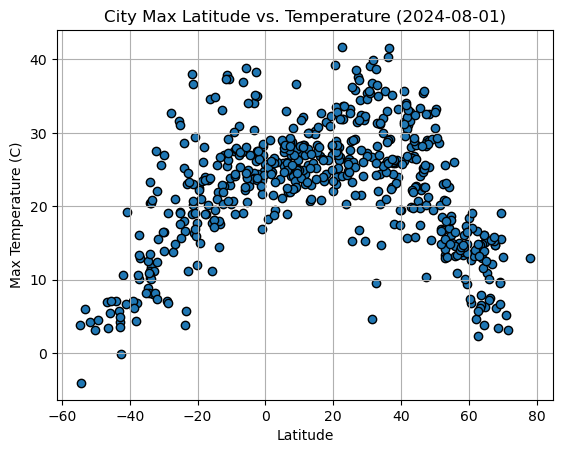

In [62]:
import datetime

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
unix_timestamp = city_data_df["Date"][0]
readable_date = datetime.datetime.fromtimestamp(unix_timestamp)
formatted_date = readable_date.strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs. Temperature ({formatted_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

#Add grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

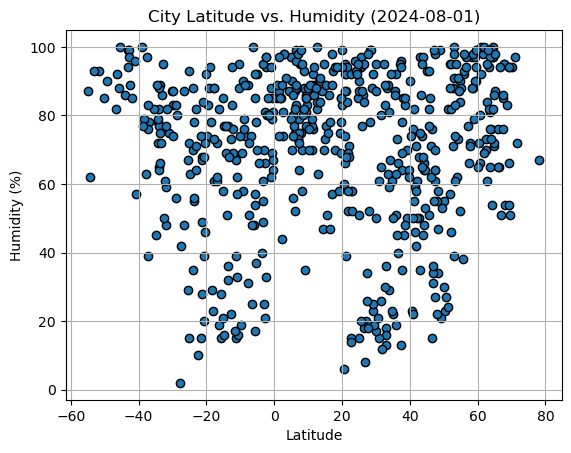

In [63]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({formatted_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

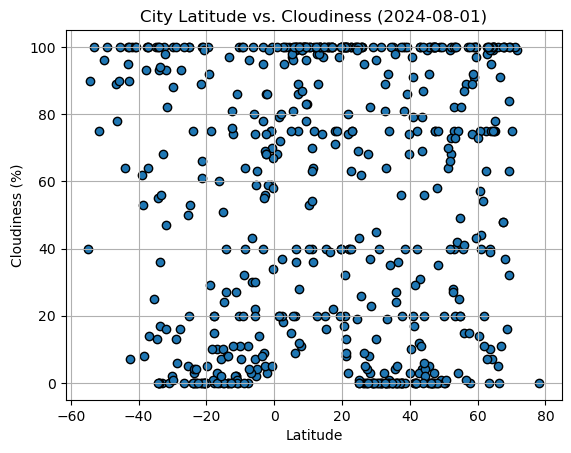

In [64]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

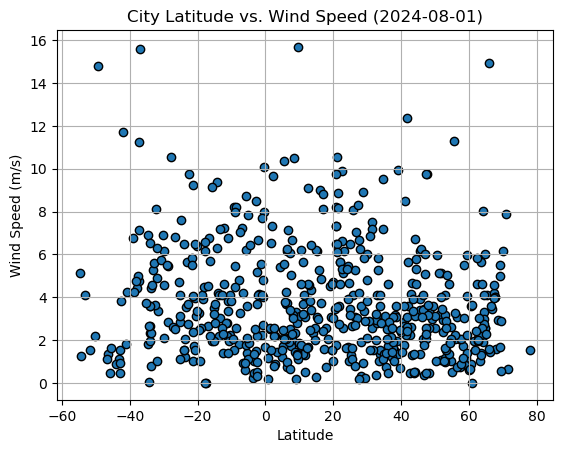

In [65]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [122]:
# Define a function to create Linear Regression plots
def drawLinearRegressionPlot(x, y, hemisphere, y_label, title, text_coords):
    # Perform linear regression using linregress
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line
    regression_line = slope * x + intercept
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    #plt.text(x.min(), y.min(), equation_text, fontsize=15, color='red')
    
    # Create scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, regression_line, "r-")

    # Annotate the regression equation
    plt.annotate(equation_text, text_coords, fontsize=15, color='red')

    # Add titles and labels
    plt.xlabel('Latitude')
    plt.ylabel(y_label) #('Max Temp')
    plt.title(f'{title} ({hemisphere} Hemisphere)')
    print(f"The r^2-value is: {r_value**2}")

    # Show plot
    plt.show()


In [123]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,31.53,70,75,2.57,JM,1722542332
8,dunay,42.8803,132.3375,19.92,97,100,2.61,RU,1722542334
9,kiboga,0.9161,31.7742,18.21,85,68,0.20,UG,1722542334
15,wailua homesteads,22.0669,-159.3780,26.44,71,40,5.66,US,1722542335
17,stanley,54.8680,-1.6985,18.73,84,20,1.03,GB,1722542336


In [124]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,11.77,89,17,0.77,ZA,1722542332
2,mitsamiouli,-11.3847,43.2844,25.43,67,2,2.81,KM,1722542332
3,richards bay,-28.7830,32.0377,19.01,80,6,5.47,ZA,1722542333
4,severinia,-20.8094,-48.8028,29.46,20,0,3.98,BR,1722542333
5,antofagasta,-23.6500,-70.4000,16.60,78,3,1.19,CL,1722542333


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3245786311580869


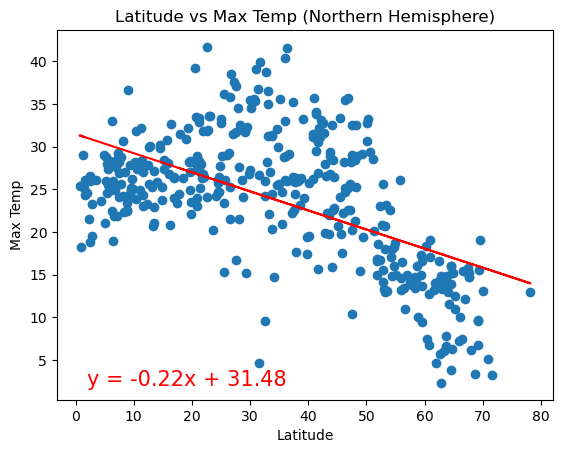

In [138]:
# Linear regression on Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern", "Max Temp", "Latitude vs Max Temp", (2, 2))

The r^2-value is: 0.5601667375835356


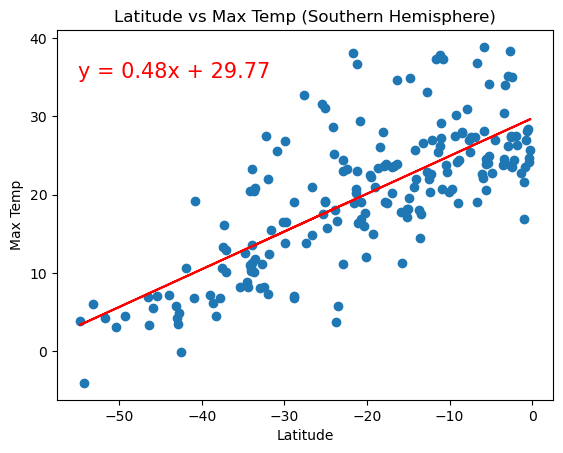

In [152]:
# Linear regression on Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern", "Max Temp", "Latitude vs Max Temp", (-55, 35))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0014450621611818571


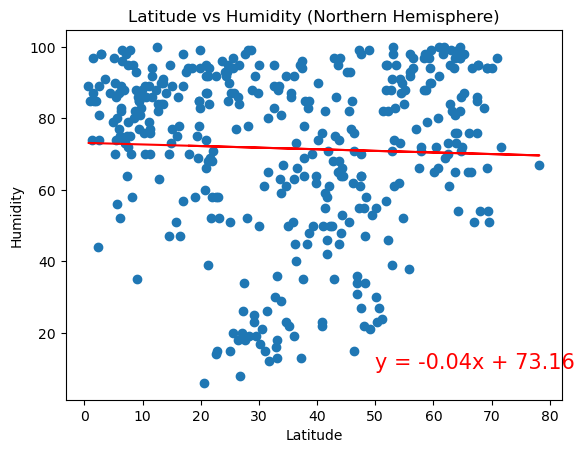

In [158]:
# Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern", "Humidity", "Latitude vs Humidity", (50, 10))


The r^2-value is: 0.05784115519228478


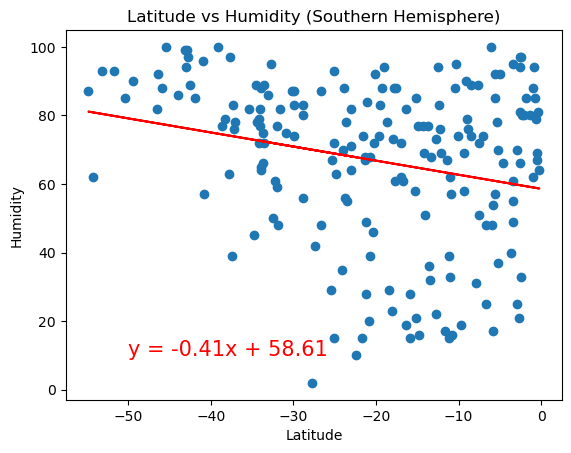

In [161]:
# Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern", "Humidity", "Latitude vs Humidity", (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.01571966051856618


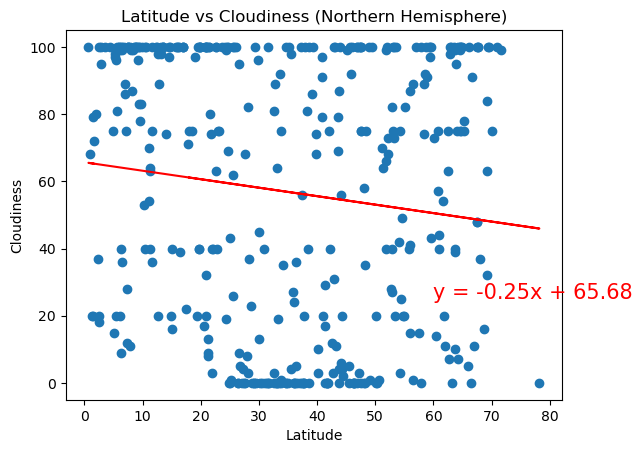

In [169]:
# Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern", "Cloudiness", "Latitude vs Cloudiness", (60, 25))


The r^2-value is: 0.05327907283905223


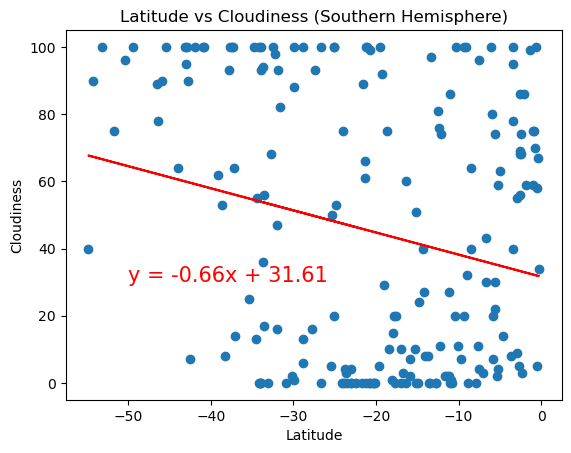

In [176]:
# Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern", "Cloudiness", "Latitude vs Cloudiness", (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.011172711621972805


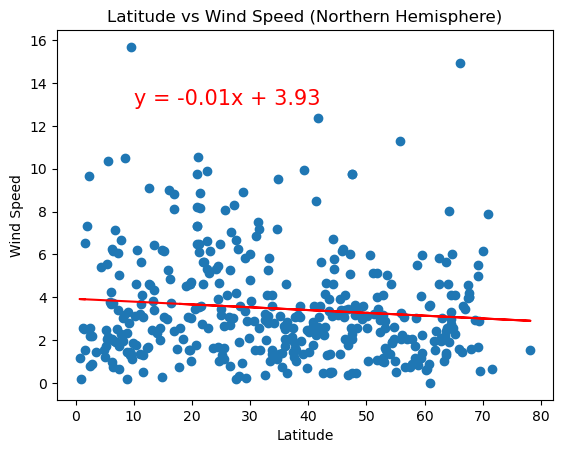

In [180]:
# Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern", "Wind Speed", "Latitude vs Wind Speed", (10, 13))

The r^2-value is: 0.0021315609310005213


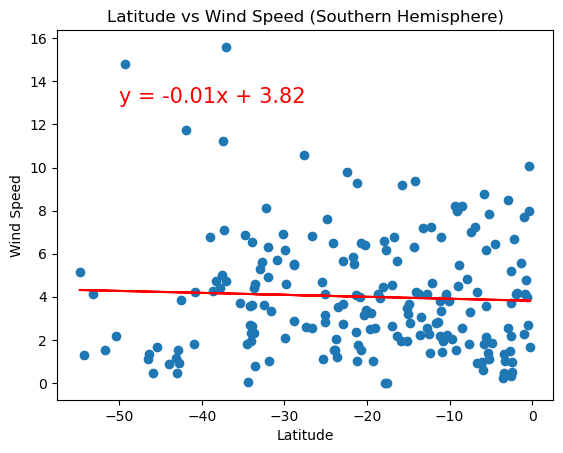

In [183]:
# Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern", "Wind Speed", "Latitude vs Wind Speed", (-50, 13))

**Discussion about the linear relationship:** YOUR RESPONSE HERE